In [3]:
%load_ext autoreload
%autoreload 2

import WineDataSet
from pprint import pprint


In [17]:
w = WineDataSet.WineDataSet()
w.gen_all_feature_combos()
w.gen_pipeline()

print('Using feature combinations: ', len(w.wine_feature_combinations))
print('Using algorithms and parameters: ')
display(w.ml_pipeline)

Using feature combinations:  1
Using algorithms and parameters: 


[LogisticRegression(solver='liblinear'),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000),
 GaussianNB()]

In [19]:
import pandas as pd

evaluation_result = w.evaluate_ml(smote=True, random_state=10)
for er in evaluation_result:
    print(f"========= {er['algo']} ==========")

    print('cohen kappa score: ', er['cohen kappa score'])
    print('cross val score: ', er['cross val score'])
    print('cross val mean: ', er['cross val mean'])

    display(er['classification report'])

    conf_matrix = pd.DataFrame(
        er['confusion matrix'],
        index=("low", "medium", "high"),
        columns=("low", "medium", "high")
    )
    display(conf_matrix)


IntProgress(value=0, max=6)

========= SVC() ==========
cohen kappa score:  0.492645684700342
cross val score:  [0.47637292 0.44742444 0.43465304 0.39250745 0.40102171]
cross val mean:  0.43039591315453385


'              precision    recall  f1-score   support\n\n        high       0.69      0.89      0.78       803\n         low       0.67      0.78      0.72       762\n      medium       0.58      0.31      0.41       784\n\n    accuracy                           0.66      2349\n   macro avg       0.65      0.66      0.63      2349\nweighted avg       0.65      0.66      0.64      2349\n'

,low,medium,high
low,715,22,66
medium,54,595,113
high,265,274,245


========= GaussianNB() ==========
cohen kappa score:  0.3427818384903294
cross val score:  [0.5764155  0.53980417 0.49340145 0.51511281 0.52873563]
cross val mean:  0.5306939123031077


'              precision    recall  f1-score   support\n\n        high       0.55      0.82      0.66       803\n         low       0.59      0.73      0.66       762\n      medium       0.49      0.13      0.20       784\n\n    accuracy                           0.56      2349\n   macro avg       0.54      0.56      0.51      2349\nweighted avg       0.54      0.56      0.51      2349\n'

,low,medium,high
low,660,87,56
medium,152,560,50
high,385,298,101


========= LogisticRegression(solver='liblinear') ==========
cohen kappa score:  0.38403401693836137
cross val score:  [0.54746701 0.57300979 0.50617284 0.55427842 0.56832695]
cross val mean:  0.5498510004257131


'              precision    recall  f1-score   support\n\n        high       0.63      0.78      0.70       803\n         low       0.58      0.80      0.67       762\n      medium       0.49      0.19      0.27       784\n\n    accuracy                           0.59      2349\n   macro avg       0.57      0.59      0.55      2349\nweighted avg       0.57      0.59      0.55      2349\n'

,low,medium,high
low,628,96,79
medium,77,607,78
high,297,338,149


========= DecisionTreeClassifier() ==========
cohen kappa score:  0.685694564786395
cross val score:  [0.66624095 0.69604087 0.66411239 0.74329502 0.7458493 ]
cross val mean:  0.703107705406556


'              precision    recall  f1-score   support\n\n        high       0.91      0.91      0.91       803\n         low       0.76      0.74      0.75       762\n      medium       0.70      0.72      0.71       784\n\n    accuracy                           0.79      2349\n   macro avg       0.79      0.79      0.79      2349\nweighted avg       0.79      0.79      0.79      2349\n'

,low,medium,high
low,732,16,55
medium,11,562,189
high,64,157,563


========= KNeighborsClassifier() ==========
cohen kappa score:  0.6337496486412724
cross val score:  [0.64027246 0.70327799 0.70583227 0.75734355 0.74882929]
cross val mean:  0.7111111111111111


'              precision    recall  f1-score   support\n\n        high       0.79      0.98      0.88       803\n         low       0.72      0.76      0.74       762\n      medium       0.73      0.52      0.61       784\n\n    accuracy                           0.76      2349\n   macro avg       0.75      0.75      0.74      2349\nweighted avg       0.75      0.76      0.74      2349\n'

,low,medium,high
low,787,2,14
medium,46,581,135
high,157,219,408


========= RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000) ==========
cohen kappa score:  0.796230155492829
cross val score:  [0.68028948 0.76585781 0.72882077 0.85483184 0.84120903]
cross val mean:  0.7742017879948915


'              precision    recall  f1-score   support\n\n        high       0.95      0.98      0.96       803\n         low       0.82      0.83      0.83       762\n      medium       0.81      0.78      0.80       784\n\n    accuracy                           0.86      2349\n   macro avg       0.86      0.86      0.86      2349\nweighted avg       0.86      0.86      0.86      2349\n'

,low,medium,high
low,785,2,16
medium,4,630,128
high,36,133,615


In [7]:
print(w.best_rfc_params())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

=================== white ===================
accuracy score 0.879263670817542
cohen kappa score 0.8188704452764739
cross val score [0.75852734 0.7601516  0.79913373 0.86464537 0.84507042]
classification report               precision    recall  f1-score   support

        high       0.96      0.98      0.97       609
         low       0.84      0.84      0.84       601
      medium       0.84      0.82      0.83       637

    accuracy                           0.88      1847
   macro avg       0.88      0.88      0.88      1847
weighted avg       0.88      0.88      0.88      1847



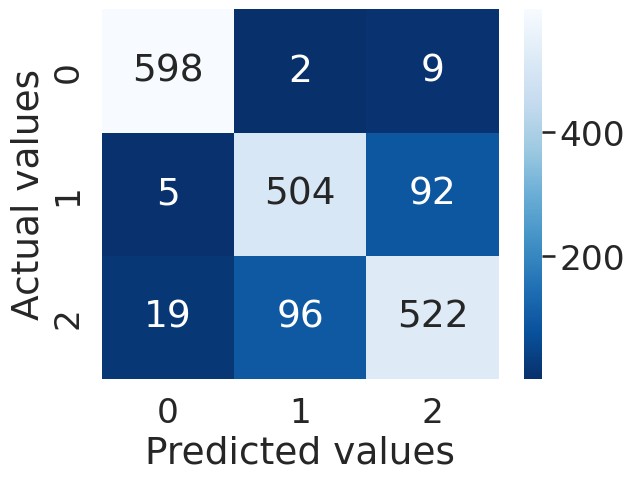

In [11]:
# WHITE wine with SMOTE
res = w.learn_rfc(random_state=1, wine_type='white', smote=True)
w.print_confusion_matrix(res['confusion matrix'])

=================== red ===================
accuracy score 0.8747514910536779
cohen kappa score 0.8121320630554254
cross val score [0.77335984 0.8187251  0.83665339 0.79681275 0.79880478]
classification report               precision    recall  f1-score   support

        high       0.98      1.00      0.99       170
         low       0.86      0.79      0.82       178
      medium       0.78      0.83      0.80       155

    accuracy                           0.87       503
   macro avg       0.87      0.87      0.87       503
weighted avg       0.88      0.87      0.87       503



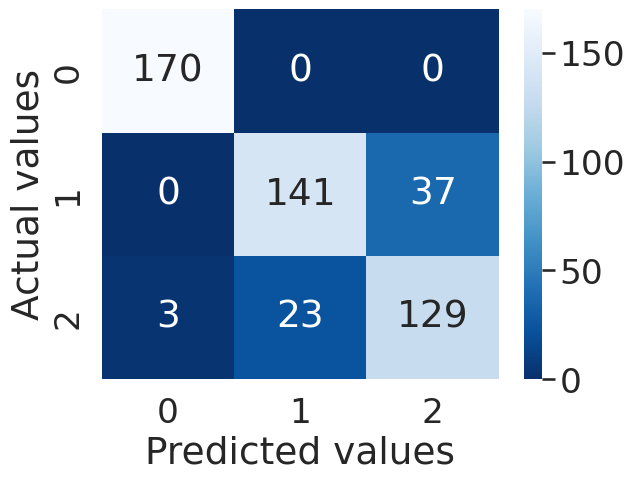

In [10]:
# RED wine with SMOTE
res = w.learn_rfc(random_state=1, wine_type='red', smote=True)
w.print_confusion_matrix(res['confusion matrix'])

=================== white ===================
accuracy score 0.7938775510204081
cohen kappa score 0.5581526154615336
cross val score [0.60408163 0.61530612 0.67755102 0.68335036 0.6721144 ]
classification report               precision    recall  f1-score   support

        high       0.84      0.43      0.57        37
         low       0.76      0.66      0.71       324
      medium       0.81      0.89      0.84       619

    accuracy                           0.79       980
   macro avg       0.80      0.66      0.71       980
weighted avg       0.79      0.79      0.79       980



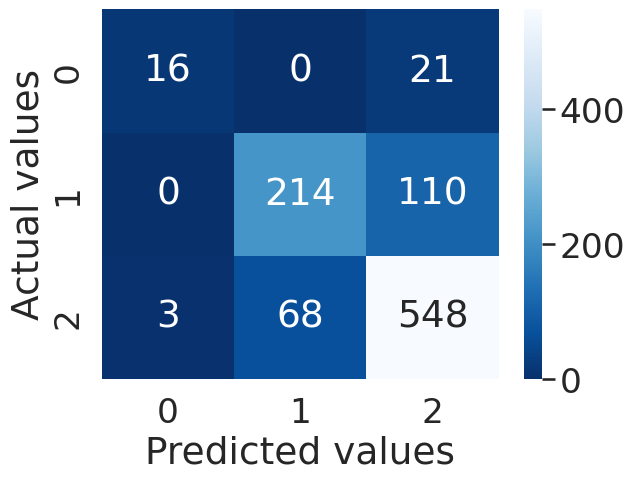

In [8]:
# WHITE wine with WO SMOTE
res = w.learn_rfc(random_state=1, wine_type='white', smote=False)
w.print_confusion_matrix(res['confusion matrix'])

=================== white ===================
accuracy score 0.7948979591836735
cohen kappa score 0.5600502978337536
cross val score [0.59591837 0.61530612 0.66836735 0.68947906 0.6618999 ]
classification report               precision    recall  f1-score   support

        high       0.84      0.43      0.57        37
         low       0.76      0.66      0.71       324
      medium       0.81      0.89      0.85       619

    accuracy                           0.79       980
   macro avg       0.80      0.66      0.71       980
weighted avg       0.79      0.79      0.79       980



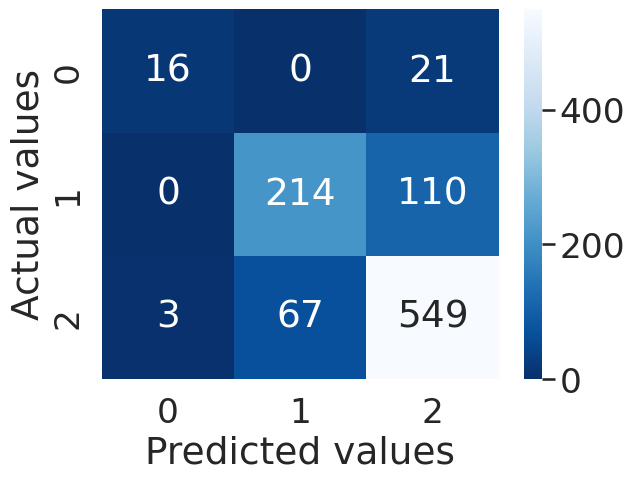

In [9]:
# RED wine with WO SMOTE
res = w.learn_rfc(random_state=1, wine_type='white', smote=False)
w.print_confusion_matrix(res['confusion matrix'])

=================== white ===================
accuracy score 0.8482142857142857
cohen kappa score 0.696458969048259
cross val score [0.67938312 0.67912266 0.74167344 0.85540211 0.84646629]
classification report               precision    recall  f1-score   support

         low       0.84      0.86      0.85       614
      medium       0.86      0.83      0.85       618

    accuracy                           0.85      1232
   macro avg       0.85      0.85      0.85      1232
weighted avg       0.85      0.85      0.85      1232



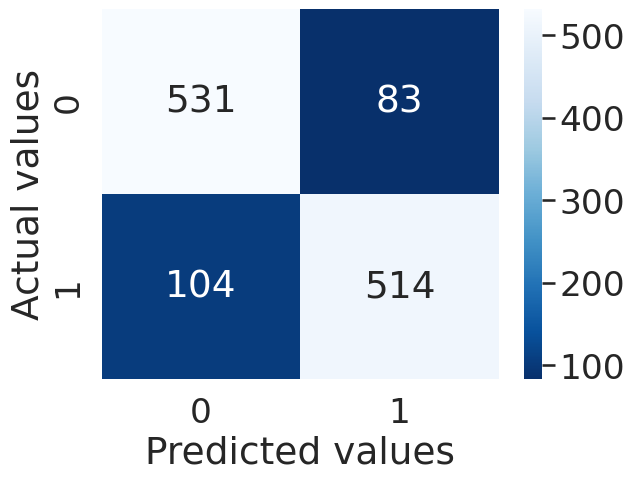

In [7]:
# WHITE wine with SMOTE and NO HIGH QUALITY
res = w.learn_rfc(random_state=1, wine_type='white', smote=True, include_high=False)
w.print_confusion_matrix(res['confusion matrix'])

=================== red ===================
accuracy score 0.7970149253731343
cohen kappa score 0.5939538697372643
cross val score [0.67462687 0.72537313 0.7641791  0.74328358 0.68862275]
classification report               precision    recall  f1-score   support

         low       0.78      0.83      0.80       168
      medium       0.82      0.77      0.79       167

    accuracy                           0.80       335
   macro avg       0.80      0.80      0.80       335
weighted avg       0.80      0.80      0.80       335



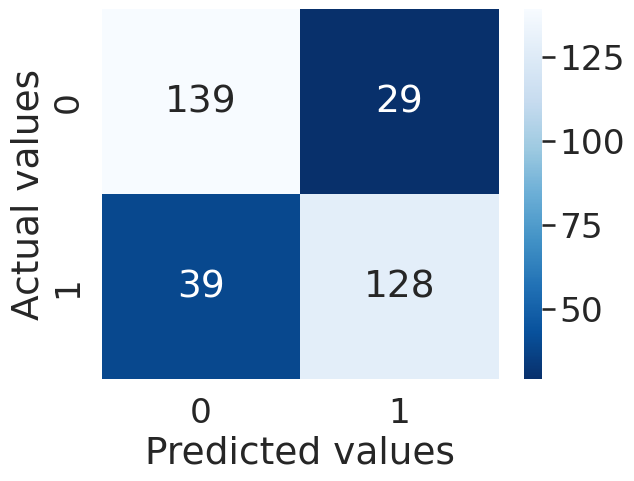

In [95]:
# WHITE wine with SMOTE and NO HIGH QUALITY
res = w.learn_rfc(random_state=1, wine_type='red', smote=True, include_high=False)
w.print_confusion_matrix(res['confusion matrix'])

In [33]:
w.add_price_data()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


Low quality price: 5.0 - 9.0
Mid quality price: 10.0 - 15.0
High quality price: 16.0 - 20.0
